<a href="https://colab.research.google.com/github/yagamiAbhi/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction
Red wine has been part of social, religious, and cultural events for hundreds of years. Medieval monasteries believed that their monks lived longer partly because of their regular, moderate drinking of wine.

Red wine is made by crushing and fermenting dark-colored, whole grapes.


There are many types of red wine, which vary in taste and color. Common varieties include Shiraz, Merlot, Cabernet sauvignon, Pinot noir and Zinfandel.

The alcohol content usually ranges from 12–15%.

According to a 2018 study, although notably there are no official recommendations around these benefits, drinking red wine in moderation has positive links with:

* cardiovascular disease
* atherosclerosis
* hypertension
* certain types of cancer
* type 2 diabetes
* neurological disorders
* metabolic syndrome


**Importing required Libs**

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [2]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**A few observations:**

1.   We can see that there are a total of 12 columns including the final quality parameter.
2.   There are no null values in the dataset



In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**A few observations:**

1.   The quality of wine varies from 3 to 8, where 5.6 is the average quality.
2.   The maximum alcohol level in the wine is 14.9 and minimum is 8.4
3.   The pH level of wine varies between 2.74 to 4.01.
4.   The pH level of wine varies between 2.74 to 4.01.
5.   The average density of wine is 0.9967.
6.    Total sulpher dioxide varies between 6.0 to 289.0.

Linear Reg
===========

In [5]:
predictor = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol']

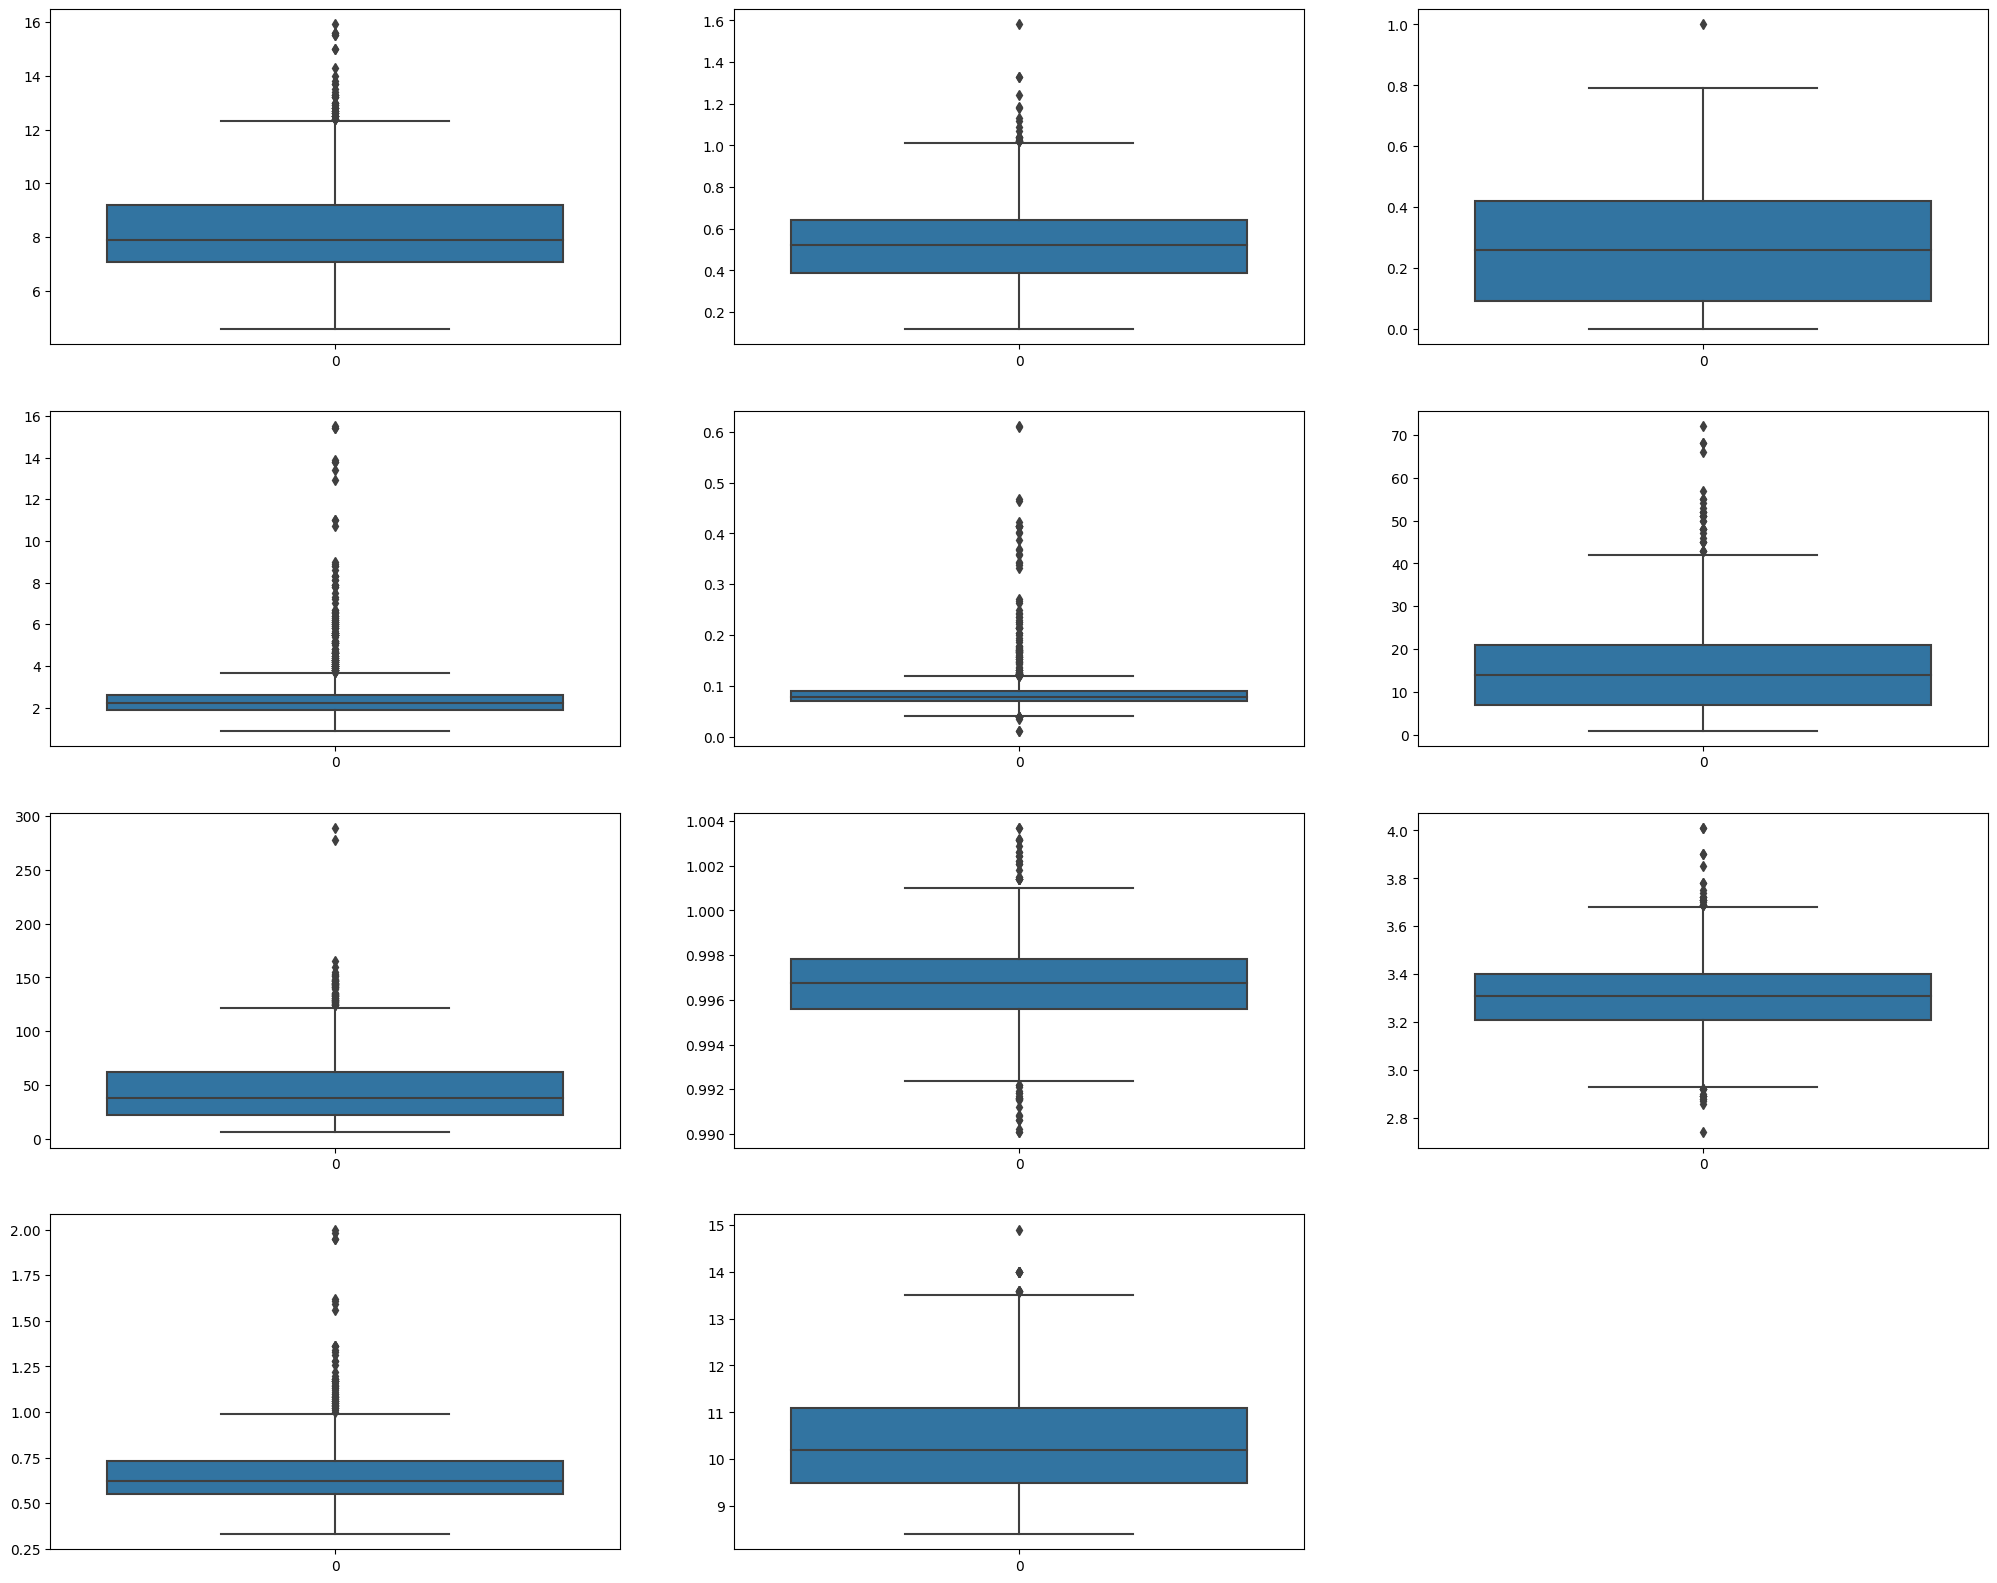

In [6]:
i=1
plt.figure(figsize=(25,20))
for col in predictor:
    plt.subplot(4,3,i)
    sns.boxplot(wine[col])
    i += 1
plt.show()

**Finding correlations among features**

In [10]:
corr_df=wine.corr()

In [11]:
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Selecting top five fetures on which wine qulity depends a lot**

In [12]:
sorted_corr = pd.DataFrame(np.abs(corr_df['quality']).sort_values(ascending=False))

In [13]:
sorted_corr.style.background_gradient(cmap="Greens",axis=None)

,quality
quality,1.000000
alcohol,0.476166
volatile acidity,0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,0.185100
density,0.174919
chlorides,0.128907
fixed acidity,0.124052
pH,0.057731


In [16]:
top_5 = sorted_corr['index'][1:6]
top_5_pred = top_5.to_list()

In [17]:
x = wine[top_5_pred]
y = wine['quality']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=80)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 5)
(1119,)
(480, 5)
(480,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
yp=lr.predict(x)

In [23]:
wine['yp'] = yp
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,yp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.072750
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.001009
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.147573
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.697447
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.072750


# Classification
--------------------
    1 LR
    2 SVM
    3 DTC
    4 KNN
    5 RF

#    1 Logistic Regression

**Let's consideringwine quality as good which is having quality greater than equal to 7 and remaining one's with Bad quality**

In [24]:
#wine['quality'].mask(wine['quality'] >= 7, 'Good',inplace=True)
#wine['quality'].mask(wine['quality'] != 'Good', 'Bad',inplace=True)
wine.loc[ wine['quality'] >= 7, ['quality'] ] = 'Good'
wine.loc[ wine['quality'] != 'Good', ['quality'] ] = 'Bad'
wine['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
 12  yp                    1599 non-null   float64
dtypes: float64(12), object(1)
memory usage: 162.5+ KB


In [26]:
x = wine[predictor]
y = wine['quality']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=70)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_lr = lr.predict(x_test)

In [31]:
print("Train Score : ", lr.score(x_train,y_train))
print("Test Score : ", lr.score(x_test,y_test))

Train Score :  0.8733385457388585
Test Score :  0.896875


Performance
------------------

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [33]:
precision=[]
recall=[]
class_model=[]
Accuracy=[]
F1_Score=[]

In [34]:
def res(classifier, y_actual, y_predicted):
    class_model.append(classifier)
    print('Result for classiefier : ',classifier)
    print('Accuracy               : ',accuracy_score(y_actual, y_predicted))
    print('Precision              : ',precision_score(y_actual, y_predicted,pos_label='Good'))
    print('Recall                 : ',recall_score(y_actual, y_predicted,pos_label='Good'))
    print('F1 Score               : ',f1_score(y_actual, y_predicted,pos_label='Good'))
    print('Confusion Matrix\n'       ,confusion_matrix(y_actual, y_predicted))
    Accuracy.append(accuracy_score(y_actual, y_predicted))
    precision.append(precision_score(y_actual, y_predicted,pos_label='Good'))
    recall.append(recall_score(y_actual, y_predicted,pos_label='Good'))
    F1_Score.append(f1_score(y_actual, y_predicted,pos_label='Good'))

In [35]:
res('LR',y_test,y_lr)

Result for classiefier :  LR
Accuracy               :  0.896875
Precision              :  0.7142857142857143
Recall                 :  0.2564102564102564
F1 Score               :  0.3773584905660377
Confusion Matrix
 [[277   4]
 [ 29  10]]


# SVM

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train,y_train)
y_svm = svm.predict(x_test)

In [38]:
res('SVM',y_test,y_svm)

Result for classiefier :  SVM
Accuracy               :  0.878125
Precision              :  0.0
Recall                 :  0.0
F1 Score               :  0.0
Confusion Matrix
 [[281   0]
 [ 39   0]]


DTC
===

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc = DecisionTreeClassifier(criterion="gini",max_depth=5)
dtc.fit(x_train,y_train)
y_dtc = dtc.predict(x_test)

In [41]:
res('DTC',y_test,y_dtc)

Result for classiefier :  DTC
Accuracy               :  0.88125
Precision              :  0.5217391304347826
Recall                 :  0.3076923076923077
F1 Score               :  0.3870967741935484
Confusion Matrix
 [[270  11]
 [ 27  12]]


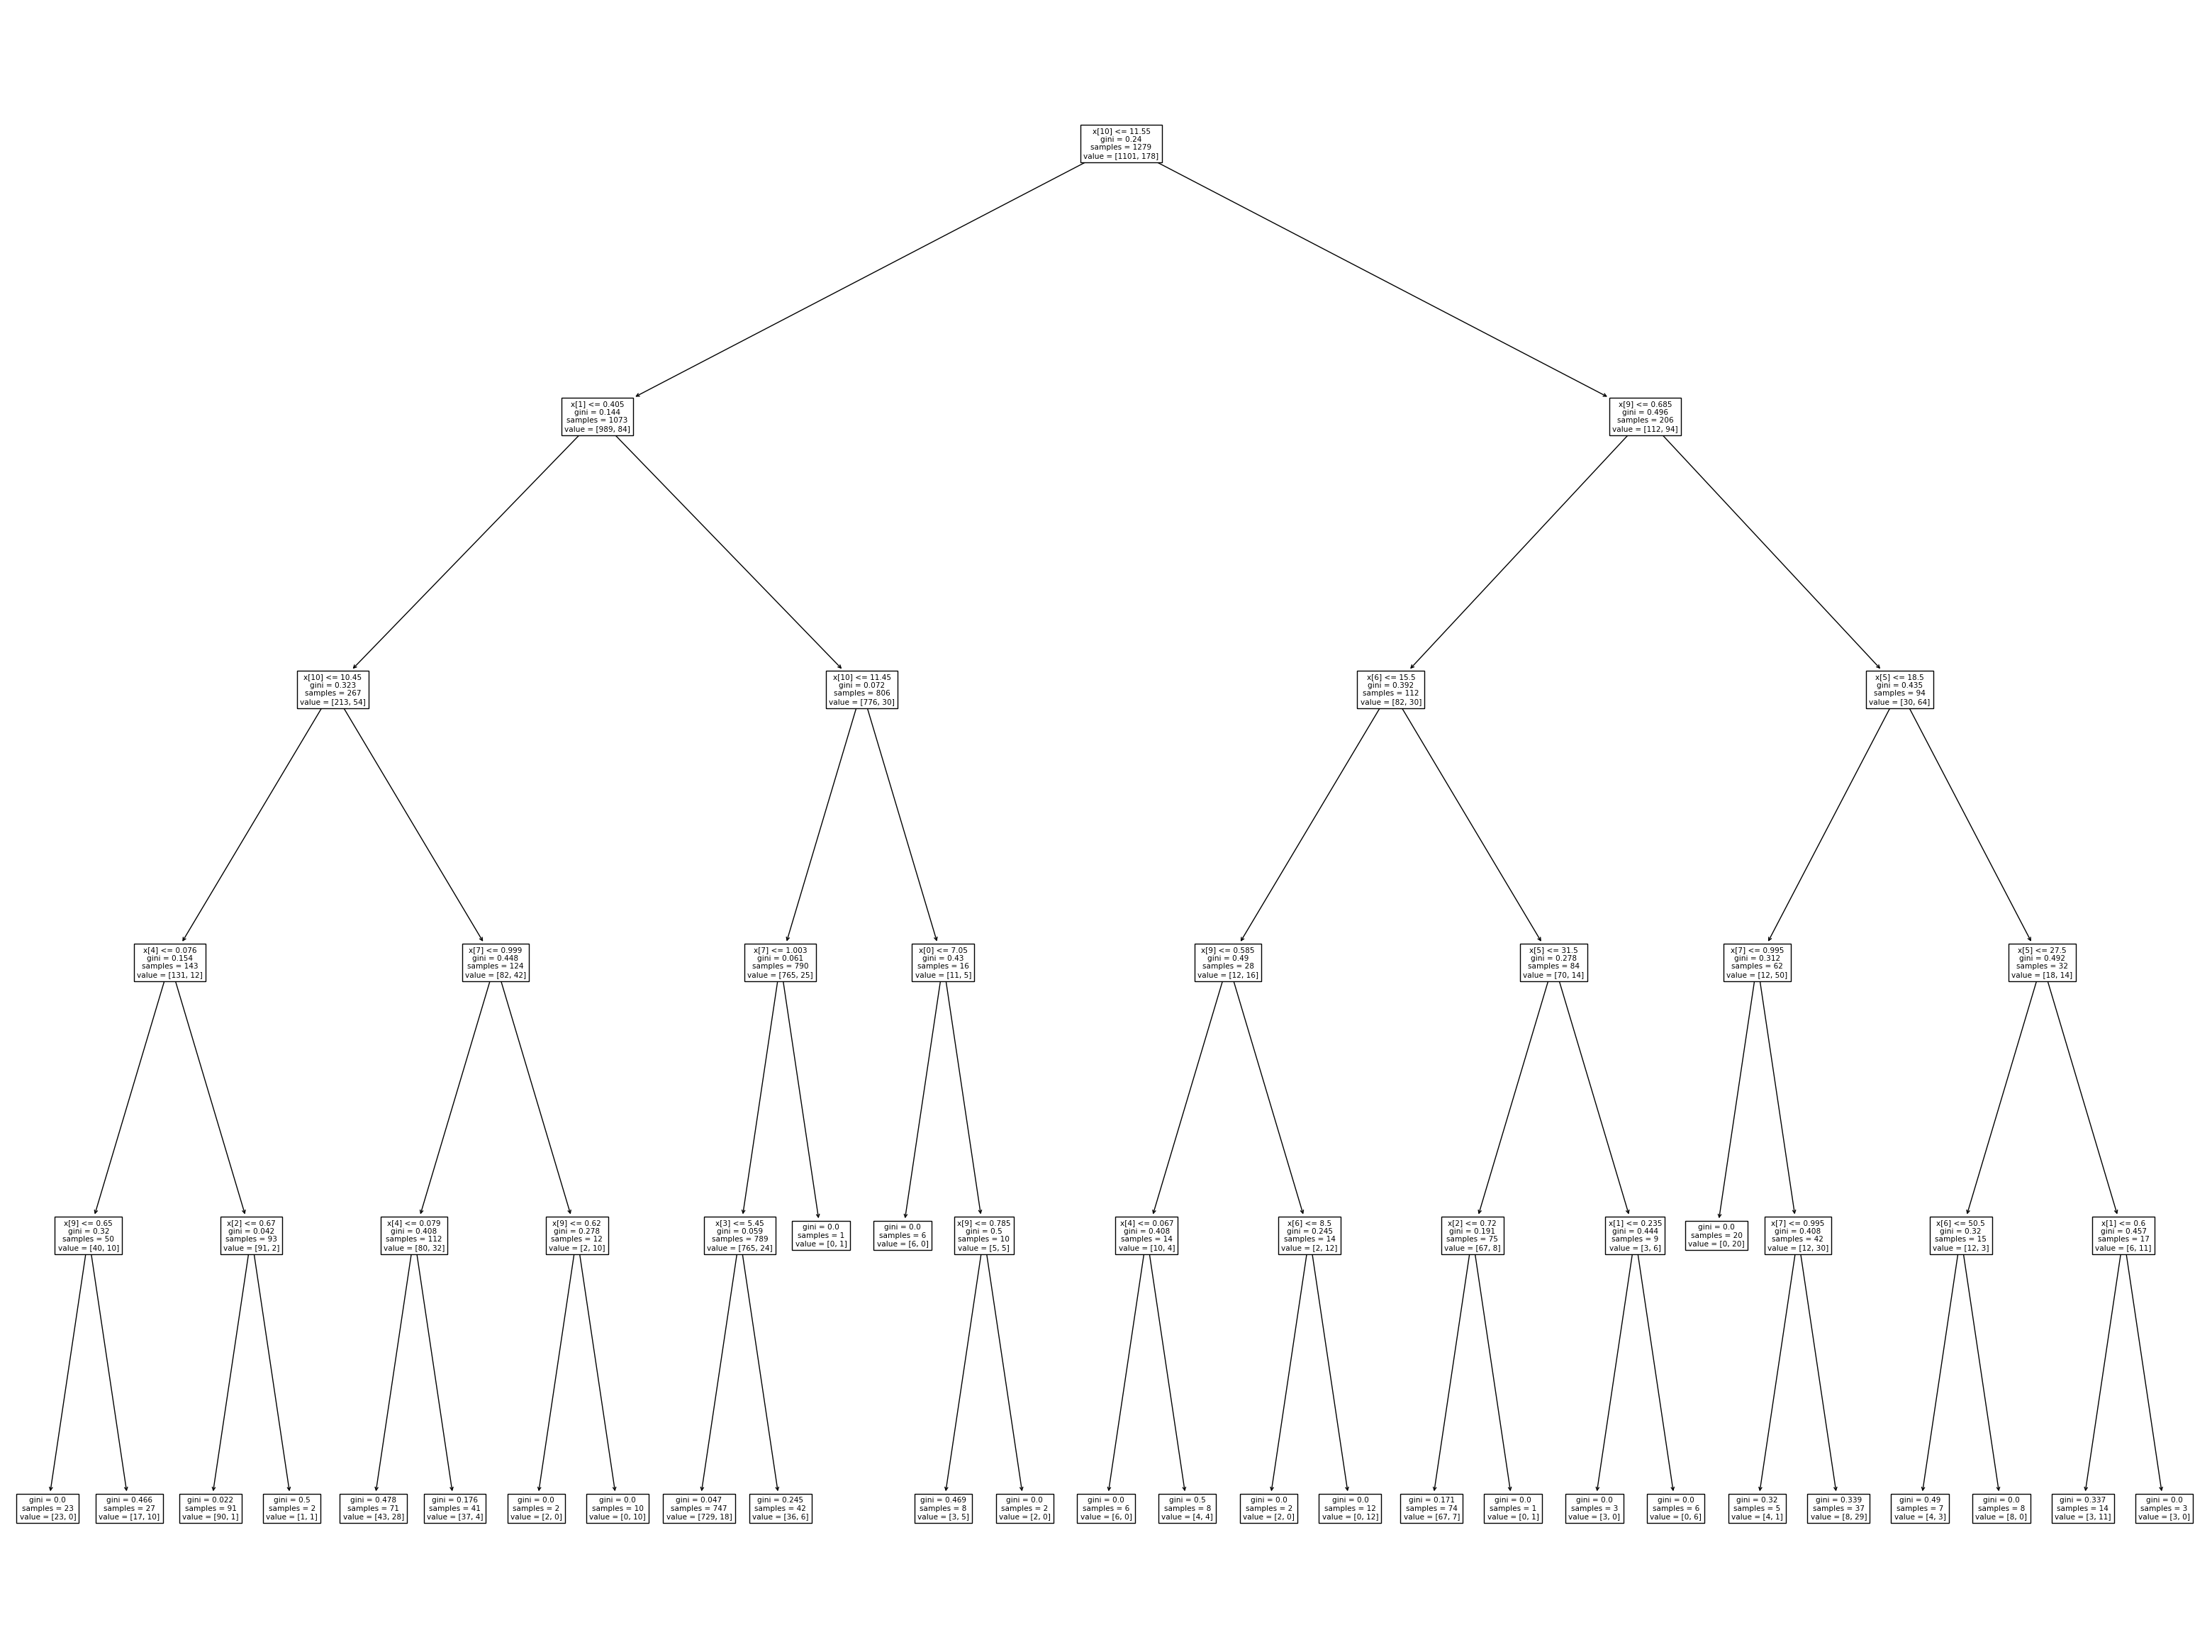

In [42]:
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(dtc)
plt.show()

KNN
====

Normalizing
--------------

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
wine[predictor] = scaler.fit_transform(wine[predictor])

In [46]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,yp
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,Bad,5.072750
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,Bad,5.001009
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,Bad,5.147573
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,Bad,5.697447
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,Bad,5.072750


In [47]:
x = wine[predictor]
y = wine['quality']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=70)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_knn = knn.predict(x_test)

In [51]:
res('KNN',y_test,y_knn)

Result for classiefier :  KNN
Accuracy               :  0.915625
Precision              :  0.7142857142857143
Recall                 :  0.5128205128205128
F1 Score               :  0.5970149253731343
Confusion Matrix
 [[273   8]
 [ 19  20]]


Ensemble Learning
==========

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF= RandomForestClassifier(random_state=0)
RF.fit(x_train,y_train)
y_rf = RF.predict(x_test)

In [54]:
res('RF',y_test,y_rf)

Result for classiefier :  RF
Accuracy               :  0.928125
Precision              :  0.8076923076923077
Recall                 :  0.5384615384615384
F1 Score               :  0.6461538461538461
Confusion Matrix
 [[276   5]
 [ 18  21]]


## Comparion among different Classification models

In [55]:
result_df=pd.DataFrame({'Accuracy':Accuracy, 'Prescision':precision, 'Recall':recall},index=class_model)
result_df

,Accuracy,Prescision,Recall
LR,0.896875,0.714286,0.256410
SVM,0.878125,0.000000,0.000000
DTC,0.881250,0.521739,0.307692
KNN,0.915625,0.714286,0.512821
RF,0.928125,0.807692,0.538462
